In [145]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [146]:
#load dataset
data = pd.read_csv("exchange_rate.csv", parse_dates=["date"], index_col="date", date_parser=lambda x: pd.to_datetime(x, format="%d-%m-%Y %H:%M"))
data.sort_index(inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_22284\2562660970.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv("exchange_rate.csv", parse_dates=["date"], index_col="date", date_parser=lambda x: pd.to_datetime(x, format="%d-%m-%Y %H:%M"))


In [147]:
# Check the first few rows
print(data.head())

            Ex_rate
date               
1990-01-01   0.7855
1990-01-02   0.7818
1990-01-03   0.7867
1990-01-04   0.7860
1990-01-05   0.7849


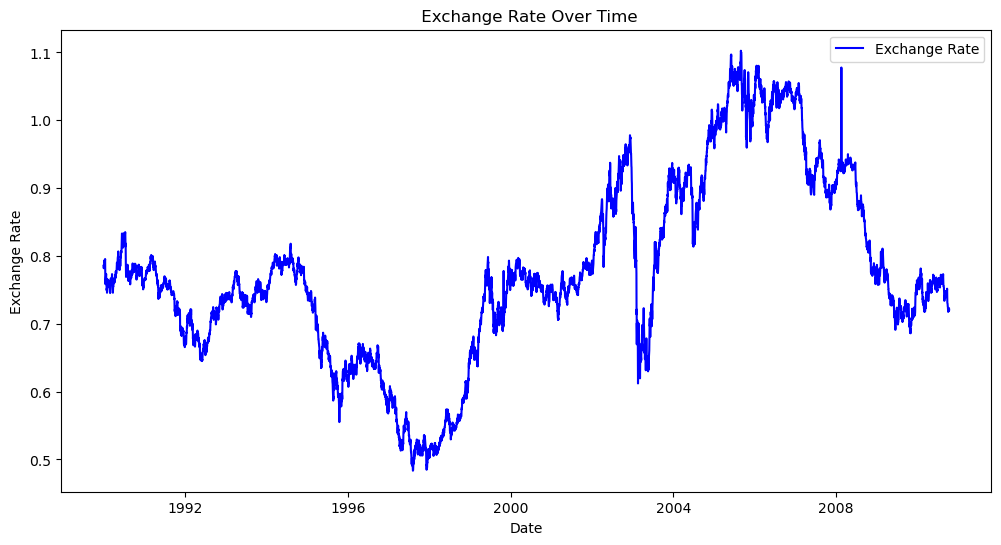

In [148]:
#Initial Exploration 
# Plotting the time series
# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Ex_rate"], label="Exchange Rate", color="blue")
plt.title(" Exchange Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()


In [149]:
data = data.interpolate(method="time") 

In [150]:

# Handling missing values
print(data.isnull().sum())


Ex_rate    0
dtype: int64


#Model Building - ARIMA


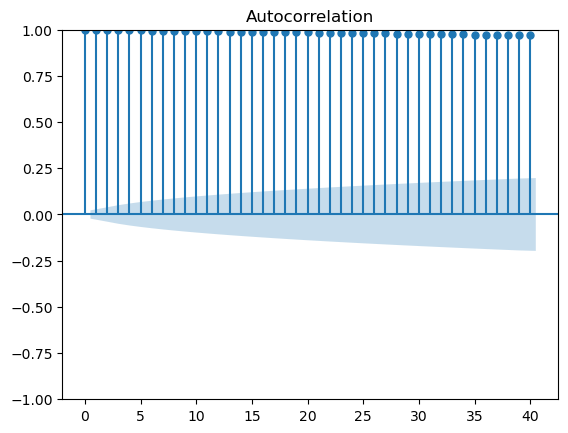

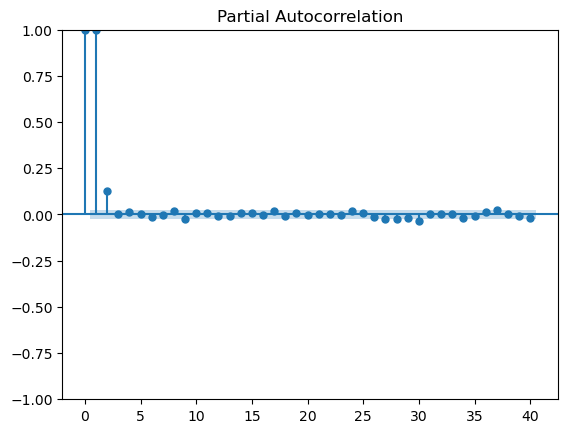

In [152]:
#Parameter Selection using ACF and PACF 

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plot_acf(data.iloc[:, 0], lags=40)
plt.show()
plot_pacf(data.iloc[:, 0], lags=40)
plt.show()


In [153]:
#Model Fitting 

# Differencing to achieve stationarity (d=1 assumed)
diff_data = data.iloc[:, 0].diff().dropna()

In [154]:
# Verify stationarity
adf_test = adfuller(diff_data)
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])


ADF Statistic: -99.39343120118626
p-value: 0.0


In [155]:
# Fit ARIMA model
arima_model = ARIMA(data.iloc[:, 0], order=(1, 1, 1))  # Example parameters
arima_result = arima_model.fit()


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


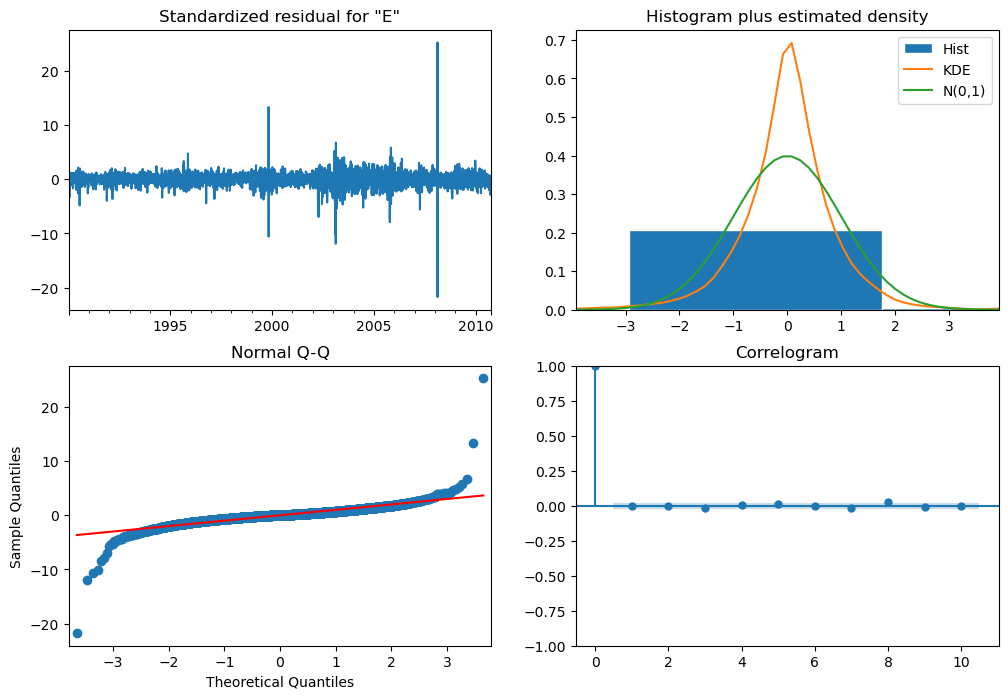

In [156]:
#  Diagnostics
arima_result.plot_diagnostics(figsize=(12, 8))
plt.show()


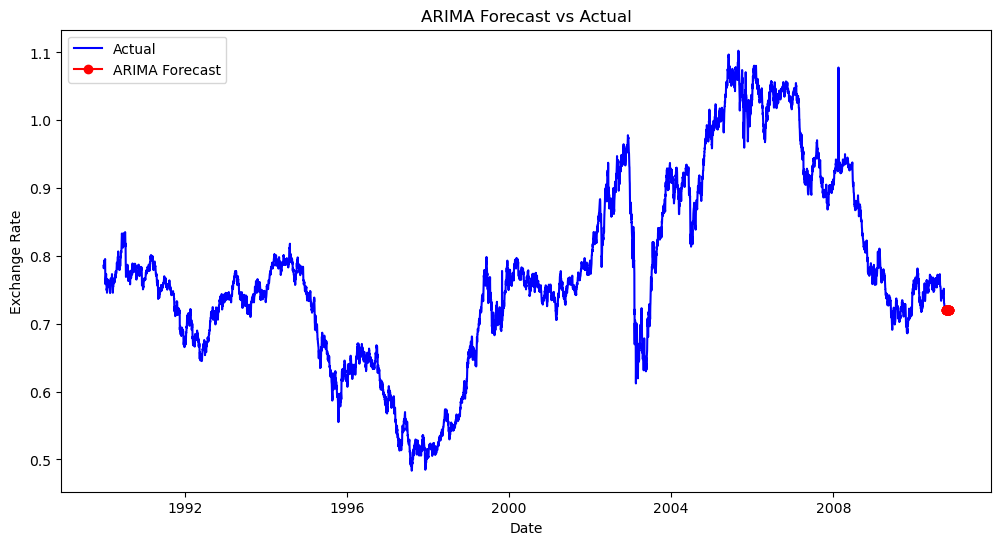

In [157]:
#Forecasting


forecast_arima = arima_result.forecast(steps=30)
forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
# Plotting ARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Ex_rate"], label="Actual", color="blue")
plt.plot(forecast_dates, forecast_arima, label="ARIMA Forecast", color="red", linestyle='-', marker='o')
plt.title("ARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()

#Model Building - Exponential Smoothing

In [159]:
#Model Selection (Assuming no seasonality for simplicity)
holt_model = ExponentialSmoothing(data["Ex_rate"], trend="add", seasonal=None)

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [160]:
#Parameter Optimization and Fitting
holt_fit = holt_model.fit(optimized=True)

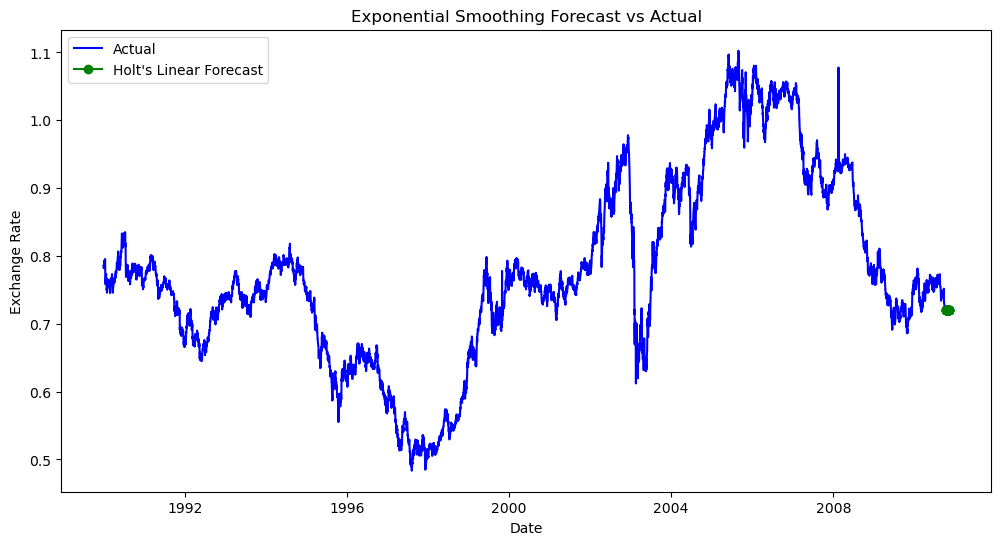

In [161]:
#Forecasting
forecast_holt = holt_fit.forecast(steps=30)
forecast_dates_holt = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
# Plotting Holt's Linear forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Ex_rate"], label="Actual", color="blue")
plt.plot(forecast_dates_holt, forecast_holt, label="Holt's Linear Forecast", color="green", linestyle='-', marker='o')
plt.title("Exponential Smoothing Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()


In [162]:
#Evaluation and compasrison 

# Error Metrics
def compute_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, rmse, mape

In [163]:
# Splitting the data into train and test for validation
train = data[:-30]
test = data[-30:]


In [164]:
# Refit ARIMA and Holt on the train data
arima_train = ARIMA(train["Ex_rate"], order=(1, 1, 1)).fit()
holt_train = ExponentialSmoothing(train["Ex_rate"], trend="add", seasonal=None).fit(optimized=True)


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [165]:
# Forecast on test data
arima_forecast = arima_train.forecast(steps=30)
holt_forecast = holt_train.forecast(steps=30)

In [166]:
# Calculate error metrics
arima_mae, arima_rmse, arima_mape = compute_metrics(test["Ex_rate"], arima_forecast)
holt_mae, holt_rmse, holt_mape = compute_metrics(test["Ex_rate"], holt_forecast)
print("ARIMA - MAE: {:.4f}, RMSE: {:.4f}, MAPE: {:.2f}%".format(arima_mae, arima_rmse, arima_mape))
print("Holt - MAE: {:.4f}, RMSE: {:.4f}, MAPE: {:.2f}%".format(holt_mae, holt_rmse, holt_mape))



ARIMA - MAE: 0.0135, RMSE: 0.0166, MAPE: 1.86%
Holt - MAE: 0.0134, RMSE: 0.0165, MAPE: 1.85%


In [167]:
# Conclusion
if arima_rmse < holt_rmse:
    print("ARIMA performed better based on RMSE.")
else:
    print("Holt's Linear model performed better based on RMSE.")

Holt's Linear model performed better based on RMSE.
